In [ ]:
## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [19]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt
titanic_data = pd.read_csv('/Users/noahholgado/Documents/ps05-noah-holgado/titanic.csv')
print(titanic_data.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [14]:
'''your code here'''
passenger_count = len(titanic_data)
percentage_male = (titanic_data['Sex'].mean() * 100)
percentage_survived = (titanic_data['Survived'].mean() * 100)

print(f"Total Passengers: {passenger_count}")
print(f"Percentage Male: {percentage_male:.2f}%")
print(f"Percentage Survived: {percentage_survived:.2f}%")

Total Passengers: 891
Percentage Male: 64.76%
Percentage Survived: 38.38%


Your written answer:

 - <Answer 1> 891
 - <Answer 2> 64.76%
 - <Answer 3> 38.38%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [15]:
'''your code here'''
gender_survival = titanic_data.groupby('Sex')['Survived'].mean() * 100

female_survival = gender_survival[0]
male_survival = gender_survival[1]

print(f"Percentage of Female Passengers Survived: {female_survival:.2f}%")
print(f"Percentage of Male Passengers Survived: {male_survival:.2f}%")

Percentage of Female Passengers Survived: 74.20%
Percentage of Male Passengers Survived: 18.89%


Your written answer:

 - <Answer 1> 74.20%
 - <Answer 2> 18.89%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [20]:
'''your code here'''
ticket_stats = titanic_data.groupby('Pclass').agg(
    Ticket_Percentage=('Pclass', lambda x: len(x) / len(titanic_data) * 100),
    Survivorship_Percentage=('Survived', 'mean')
)

ticket_stats['Survivorship_Percentage'] *= 100

class_1 = ticket_stats.loc[1]
class_2 = ticket_stats.loc[2]
class_3 = ticket_stats.loc[3]

print(f"Class 1: % tickets: {class_1['Ticket_Percentage']:.2f}%, % survivorship: {class_1['Survivorship_Percentage']:.2f}%")
print(f"Class 2: % tickets: {class_2['Ticket_Percentage']:.2f}%, % survivorship: {class_2['Survivorship_Percentage']:.2f}%")
print(f"Class 3: % tickets: {class_3['Ticket_Percentage']:.2f}%, % survivorship: {class_3['Survivorship_Percentage']:.2f}%")


Class 1: % tickets: 24.24%, % survivorship: 62.96%
Class 2: % tickets: 20.65%, % survivorship: 47.28%
Class 3: % tickets: 55.11%, % survivorship: 24.24%


Your written answer:

 - Class 1 
    - % tickets: 24.24%
    - % survivorship: 62.96%
- Class 2 
    - % tickets: 20.65%
    - % survivorship: 47.28%
- Class 3
    - % tickets: 55.11%
    - % survivorship: 24.24%


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

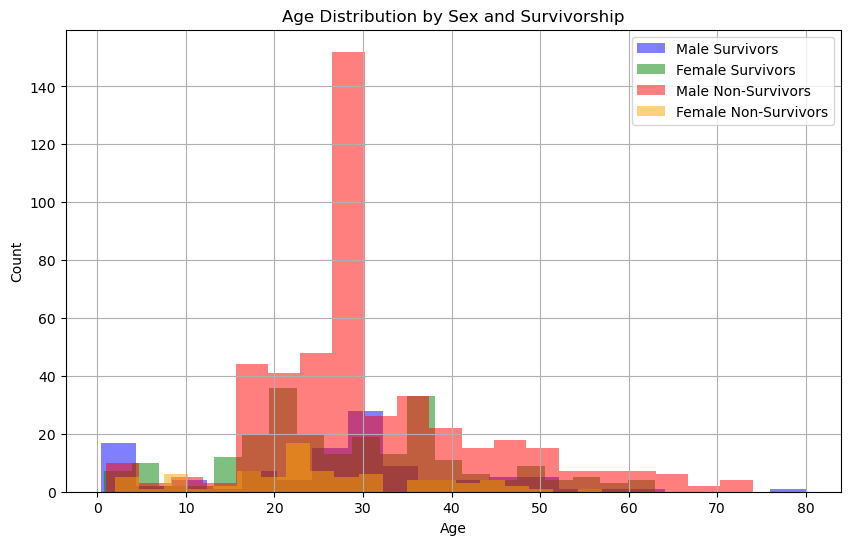

In [21]:
'''Your code here'''
survivors = titanic_data[titanic_data['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors = titanic_data[titanic_data['Survived'] == 0][['Age', 'Name', 'Sex']]


male_survivors = survivors[survivors['Sex'] == 1]['Age']
female_survivors = survivors[survivors['Sex'] == 0]['Age']
male_unlucky = non_survivors[non_survivors['Sex'] == 1]['Age']
female_unlucky = non_survivors[non_survivors['Sex'] == 0]['Age']

plt.figure(figsize=(10, 6))
plt.hist(male_survivors, bins=20, alpha=0.5, label='Male Survivors', color='blue', histtype='stepfilled')
plt.hist(female_survivors, bins=20, alpha=0.5, label='Female Survivors', color='green', histtype='stepfilled')
plt.hist(male_unlucky, bins=20, alpha=0.5, label='Male Non-Survivors', color='red', histtype='stepfilled')
plt.hist(female_unlucky, bins=20, alpha=0.5, label='Female Non-Survivors', color='orange', histtype='stepfilled')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Sex and Survivorship')
plt.legend()
plt.grid(True)
plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 4) 
tree_clf.fit(X_train, y_train)

fig, ax = plt.subplots(1, 1, figsize = (15,6))
plot_tree(tree_clf, feature_name = features, class_names = ['Drown', 'Survived'],
          filled = True, fontsize = 12)
plt.show()

NameError: name 'X_train' is not defined

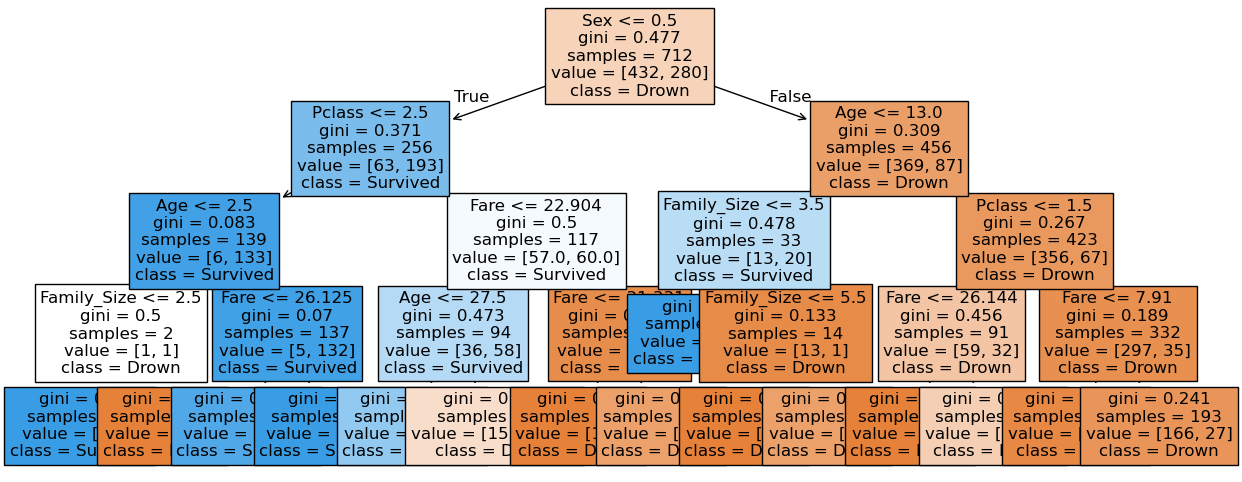

In [27]:
'''Your code here'''
label = ['Survived']
features = ['Sex', 'Age', 'Pclass', 'Fare', 'Family_Size']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_data[features], titanic_data [label], test_size = 0.2)

from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 4) 
tree_clf.fit(X_train, y_train)

fig, ax = plt.subplots(1, 1, figsize = (15,6))
plot_tree(tree_clf, feature_names = features, class_names = ['Drown', 'Survived'],
          filled = True, fontsize = 12)
plt.show()

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 

AttributeError: 'Figure' object has no attribute 'subtitle'

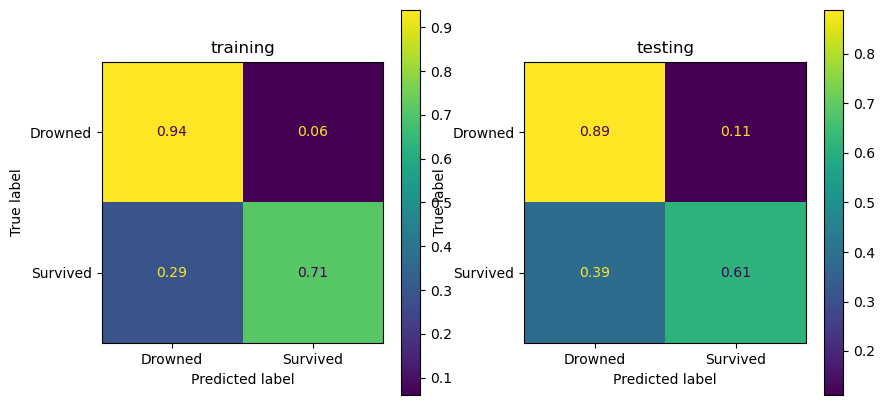

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1,2, figsize = (10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train,
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax [0])

ConfusionMatrixDisplay.from_predictions(y_test, y_tree_test,
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[1])

ax[0].set_title('training')
ax[1].set_title('testing')
fig.subtitle('Decision Tree')
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test = y_test.values.ravel()

knn_clf = KNeighborsClassifier(n_neighbors = 15, metric = 'manhattan')
knn_clf.fit(Xs_train, ys_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

AttributeError: 'Figure' object has no attribute 'subptitle'

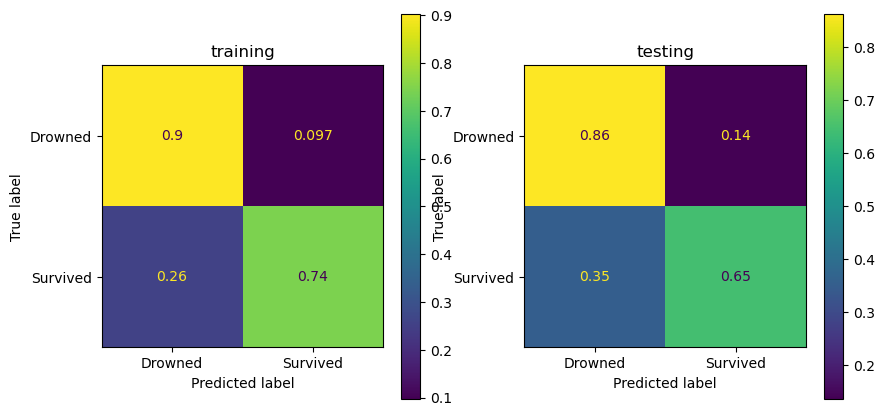

In [34]:
y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

fig, ax = plt.subplots(1,2, figsize = (10,5))

ConfusionMatrixDisplay.from_predictions(y_train, y_knn_train, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[0])

ConfusionMatrixDisplay.from_predictions(y_test, y_knn_test,
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[1])

ax[0].set_title('training')
ax[1].set_title('testing')
fig.subptitle('KNN')
plt.show()